<a href="https://colab.research.google.com/github/PabloJRW/clustering/blob/main/clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
X, y, c = make_blobs(n_samples=500,
           cluster_std=0.8,
           centers=4,
           n_features=2,
           return_centers=True,
           random_state=42)

In [3]:
X[:10]

array([[-7.9189091 ,  6.76098178],
       [-9.03713651, -6.92354549],
       [ 6.39172118,  1.32653106],
       [-2.82288415,  7.84347417],
       [-5.91865605, -7.20656989],
       [-6.21535854, -7.56497665],
       [-6.79026013,  7.246675  ],
       [-6.66326173, -6.92030008],
       [ 3.78578249,  1.8592661 ],
       [-7.37948205, -6.85923675]])

In [4]:
y

array([3, 2, 1, 0, 2, 2, 3, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 3, 3, 0, 1, 0,
       1, 3, 3, 2, 2, 3, 3, 0, 2, 0, 0, 0, 2, 2, 1, 1, 3, 3, 2, 1, 0, 0,
       0, 1, 1, 1, 2, 3, 2, 0, 3, 2, 1, 0, 0, 3, 2, 3, 3, 0, 2, 3, 1, 2,
       2, 3, 1, 2, 1, 2, 2, 3, 0, 3, 0, 2, 1, 0, 2, 1, 2, 0, 3, 3, 3, 3,
       1, 0, 3, 2, 1, 2, 1, 3, 0, 1, 0, 3, 1, 1, 1, 3, 3, 0, 0, 3, 0, 3,
       2, 3, 3, 3, 3, 2, 1, 3, 2, 2, 0, 1, 2, 1, 3, 1, 1, 2, 2, 3, 3, 1,
       1, 2, 1, 3, 3, 3, 1, 1, 2, 3, 1, 1, 2, 3, 3, 0, 0, 0, 2, 2, 1, 1,
       0, 3, 0, 3, 2, 2, 3, 3, 1, 1, 2, 0, 1, 2, 3, 3, 2, 0, 0, 3, 3, 0,
       0, 2, 2, 2, 0, 3, 0, 0, 3, 3, 0, 1, 0, 2, 2, 3, 3, 2, 0, 2, 0, 0,
       3, 2, 0, 0, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 0, 0, 2, 0, 3, 0, 1,
       1, 0, 3, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 3, 2, 0, 2, 1, 1, 1, 2,
       0, 1, 3, 3, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 3, 0, 2, 1, 0, 0, 3, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 1, 1, 0, 2, 0,
       1, 3, 1, 2, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 2,

##Generación de los datos

In [5]:
df = pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'y' : y
})

df_centers = pd.DataFrame({
    'c1': c[:, 0],
    'c2': c[:, 1]
})

df

,x1,x2,y
0,-7.918909,6.760982,3
1,-9.037137,-6.923545,2
2,6.391721,1.326531,1
3,-2.822884,7.843474,0
4,-5.918656,-7.206570,2
...,...,...,...
495,-7.718843,8.063230,3
496,-2.570879,9.287208,0
497,-7.148255,-5.544892,2
498,-7.297806,-6.040902,2


## Visualización

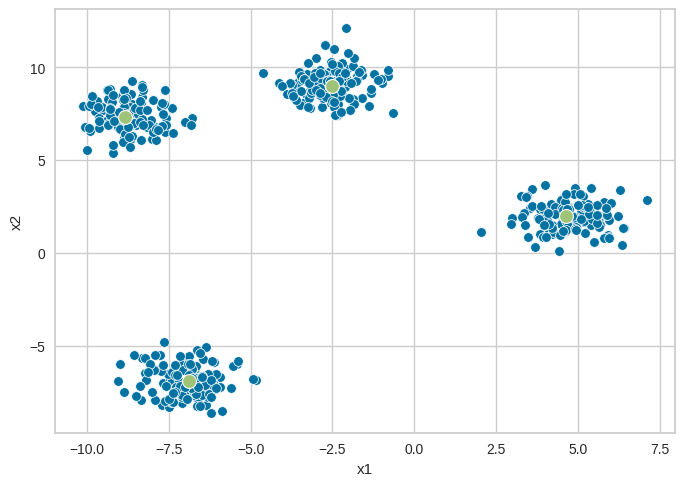

In [6]:
sns.scatterplot(x='x1', y='x2', data=df)
sns.scatterplot(x='c1', y='c2', data=df_centers, markers='X', s=100)
plt.show()

## KMeans

In [10]:
kmeans = KMeans(n_clusters=3, n_init=5)
clusters = kmeans.fit(X)
df['cluster'] = clusters.labels_
kmeans_centers = kmeans.cluster_centers_

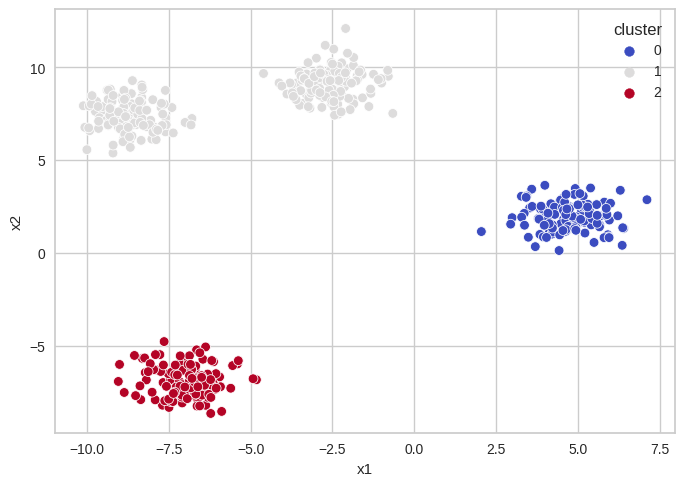

In [13]:
sns.scatterplot(data=df, x='x1', y='x2', hue='cluster', palette='coolwarm')
plt.show()

## Método del codo

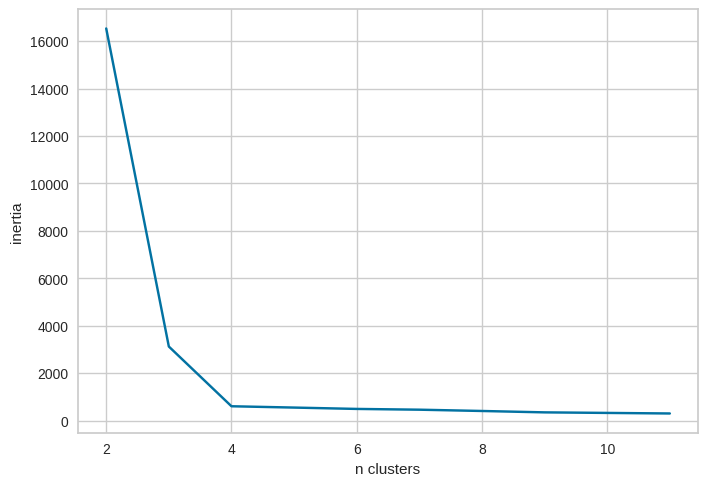

In [17]:
inertia = []
K = range(2, 12)
for n in K:
  kmeans = KMeans(n_clusters=n, n_init='auto')
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.plot(K, inertia)
plt.xlabel("n clusters")
plt.ylabel("inertia")
plt.show()

## Coeficiente de silueta

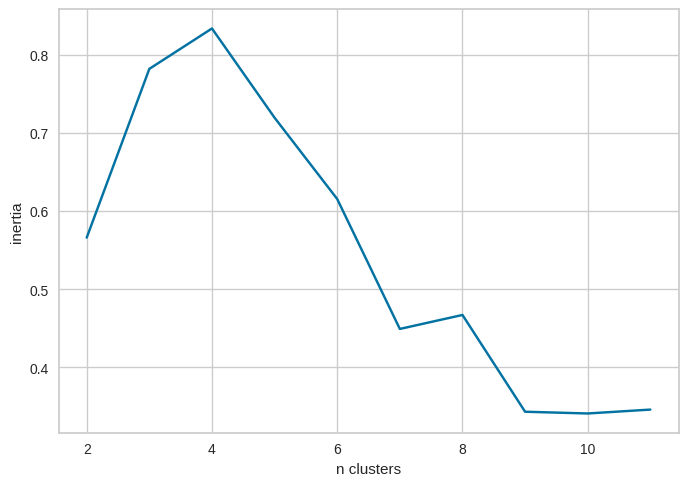

In [20]:
silhouette_scores = []
K = range(2, 12)
for n in K:
  kmeans = KMeans(n_clusters=n, n_init='auto')
  kmeans.fit(X)
  y_preds = kmeans.predict(X)
  silhouette_scores.append(silhouette_score(X, y_preds))

plt.plot(K, silhouette_scores)
plt.xlabel("n clusters")
plt.ylabel("inertia")
plt.show()

SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=4, n_init='auto'))

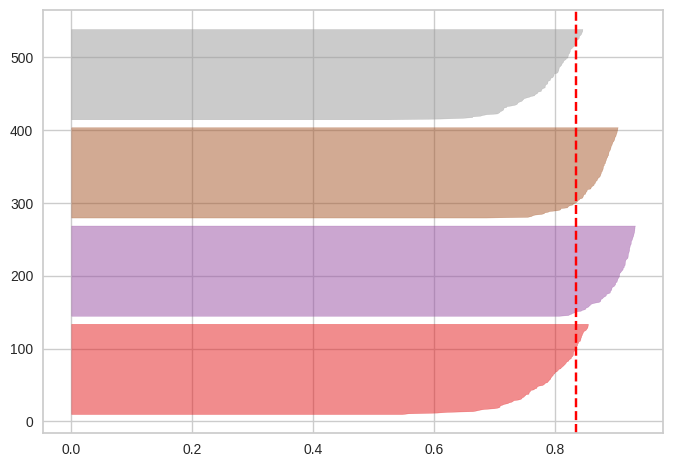

In [22]:
kmeans = KMeans(n_clusters=4, n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick')
visualizer.fit(X)
